In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Ejemplo 3.1: la función de Runge

1. Estudiar la interpolación polinómica de la función de Runge:

    $$f(x)=\frac{1}{1+25 x^2}$$

   en el intervalo [-1,1] usando polinomios de grado $N=10,\cdots,15.$

2. Estudiar la extrapolación polinómica de la función de Runge en el intervalo [-1.5,1.5].

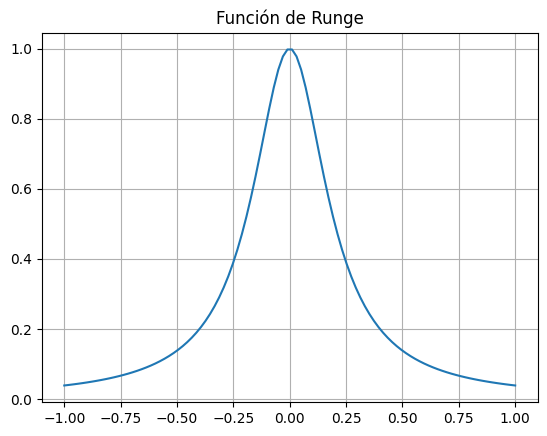

In [2]:
def f(x):
    return 1/(1+25*x**2)

x = np.linspace(-1, 1, 100)
y = f(x)

plt.plot(x, y)
plt.grid()
plt.title("Función de Runge")
plt.show()

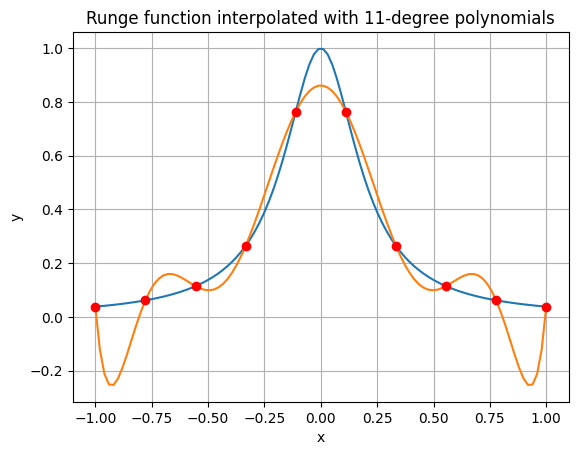

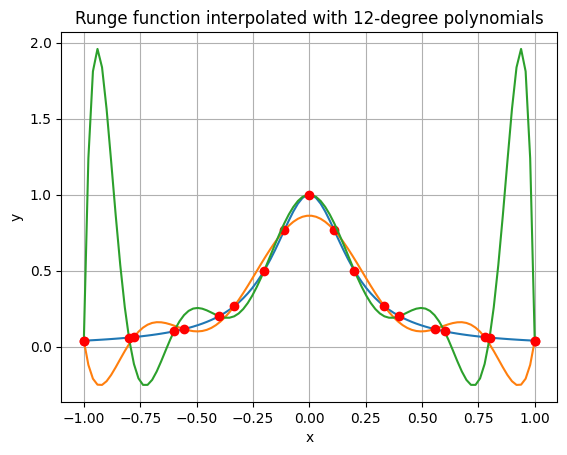

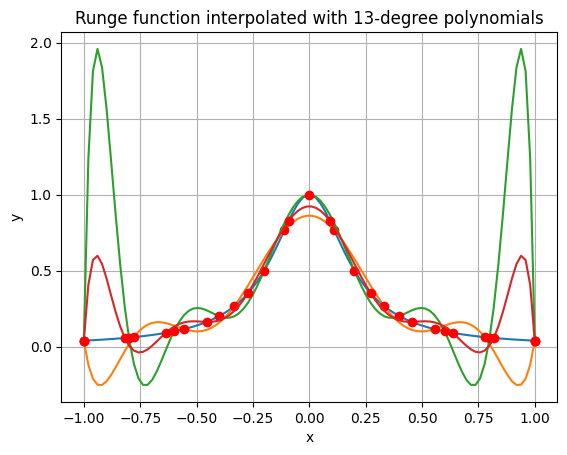

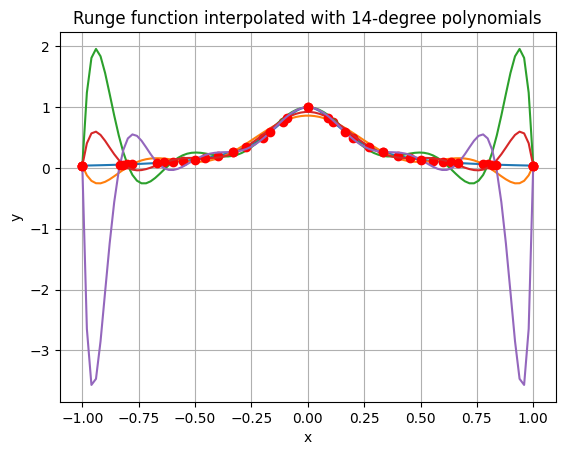

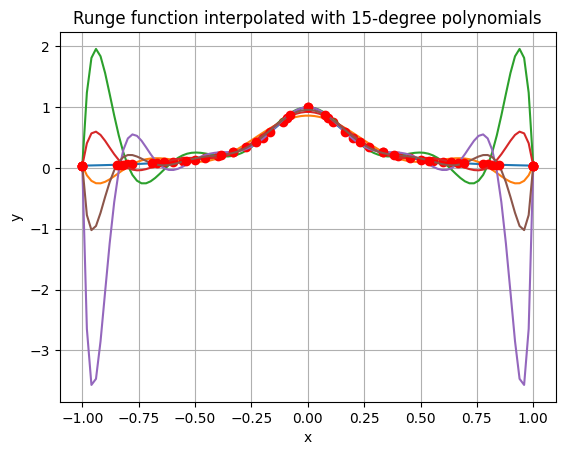

In [3]:
def runge_u(N):
    xp = np.linspace(-1, 1, N)
    uu = [1 for i in range(N)]
    for i in range(N):
        for j in [z for z in range(N) if z!=i]:
            uu[i] /= (xp[i] - xp[j])
    return uu

def runge_interpol(x, uu, N):
    xp = np.linspace(-1,1,N)
    LN = 0
    LD = 0
    
    for i in range(N):
        if x == xp[i]:
            return f(xp[i])
            break
        LN += f(xp[i]) * uu[i] / (x - xp[i])
        LD += uu[i] / (x - xp[i])
    return LN/LD


x = np.linspace(-1, 1, 100)

for N in range(11, 16):
    plt.plot(x, f(x))
    for k in range(10, N):
        uu = runge_u(k)
        p = [runge_interpol(i, uu, k) for i in x]
        plt.plot(x, p)

        xp = np.linspace(-1, 1, k)
        plt.plot(xp, f(xp), 'ro')
    plt.title(f"Runge function interpolated with {N}-degree polynomials")
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()